In [1]:
# import jax
# import jax.numpy as jnp

# jax.config.update("jax_compilation_cache_dir", "../jax-caches")
# jax.config.update("jax_persistent_cache_min_entry_size_bytes", -1)
# jax.config.update("jax_persistent_cache_min_compile_time_secs", 0)

In [14]:
import sys
import os

sys.path.insert(0, os.path.abspath("."))
sys.path.append(os.path.abspath("../../../"))

# os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.25"
# os.environ["XLA_PYTHON_CLIENT_ALLOCATOR"] = "platform"
# from desc import set_device
# set_device("gpu")

In [15]:
# from desc import set_device, _set_cpu_count

# num_device = 2
# _set_cpu_count(num_device)
# set_device("cpu", num_device=num_device)

In [16]:
import numpy as np
np.set_printoptions(linewidth=np.inf, precision=4, suppress=True, threshold=sys.maxsize)
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.graph_objects as go
import functools
import scipy

In [17]:
import desc

from desc.basis import *
from desc.backend import *
from desc.compute import *
from desc.coils import *
from desc.equilibrium import *
from desc.examples import *
from desc.grid import *
from desc.geometry import *

from desc.objectives import *
from desc.objectives.objective_funs import *
from desc.objectives.getters import *
from desc.objectives.normalization import compute_scaling_factors
from desc.objectives.utils import *
from desc.optimize._constraint_wrappers import *

from desc.transform import Transform
from desc.plotting import *
from desc.optimize import *
from desc.perturbations import *
from desc.profiles import *
from desc.compat import *
from desc.utils import *
from desc.magnetic_fields import *

from desc.__main__ import main
from desc.vmec_utils import vmec_boundary_subspace
from desc.input_reader import InputReader
from desc.continuation import solve_continuation_automatic
from desc.compute.data_index import register_compute_fun
from desc.optimize.utils import solve_triangular_regularized

print_backend_info()

DESC version=0.15.0+485.g3b795742d.
Using JAX backend: jax version=0.6.2, jaxlib version=0.6.2, dtype=float64.
Using device: CPU, with 7.84 GB available memory.


In [18]:
from desc.particles import *
from diffrax import *

In [23]:
from desc.vmec import VMECIO
eq = VMECIO.load("booz_xform/wout_LandremanPaul2021_QH_reactorScale_lowres_reference.nc", L=8, M=8, N=8, profile="current")

In [27]:
eq2 = get("precise_QH")
fig = plot_3d(eq, "|B|")
plot_3d(eq2, "|B|", fig=fig)

/home/yigit/Codes/DESC/desc/utils.py:572: UserWarning:

Unequal number of field periods for grid 1 and basis 4.

/home/yigit/Codes/DESC/desc/utils.py:572: UserWarning:

Unequal number of field periods for grid 1 and basis 4.

/home/yigit/Codes/DESC/desc/utils.py:572: UserWarning:

Unequal number of field periods for grid 1 and basis 4.

/home/yigit/Codes/DESC/desc/utils.py:572: UserWarning:

Unequal number of field periods for grid 1 and basis 4.



In [29]:
eq.solve(verbose=3, maxiter=100);

Building objective: force
Precomputing transforms
Timer: Precomputing transforms = 81.6 ms
Timer: Objective build = 93.3 ms
Building objective: lcfs R
Building objective: lcfs Z
Building objective: fixed Psi
Building objective: fixed pressure
Building objective: fixed current
Building objective: fixed sheet current
Building objective: self_consistency R
Building objective: self_consistency Z
Building objective: lambda gauge
Building objective: axis R self consistency
Building objective: axis Z self consistency
Timer: Objective build = 122 ms
Timer: LinearConstraintProjection build = 274 ms
Number of parameters: 856
Number of objectives: 5346
Timer: Initializing the optimization = 545 ms

Starting optimization
Using method: lsq-exact
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1          6.186e-09                                    3.411e-06   
       1              3          6.114e-09      7.189e-11      2.329e-03   

In [30]:
eq.save("desc_LandremanPaul2021_QH_reactorScale_lowres_reference.h5")

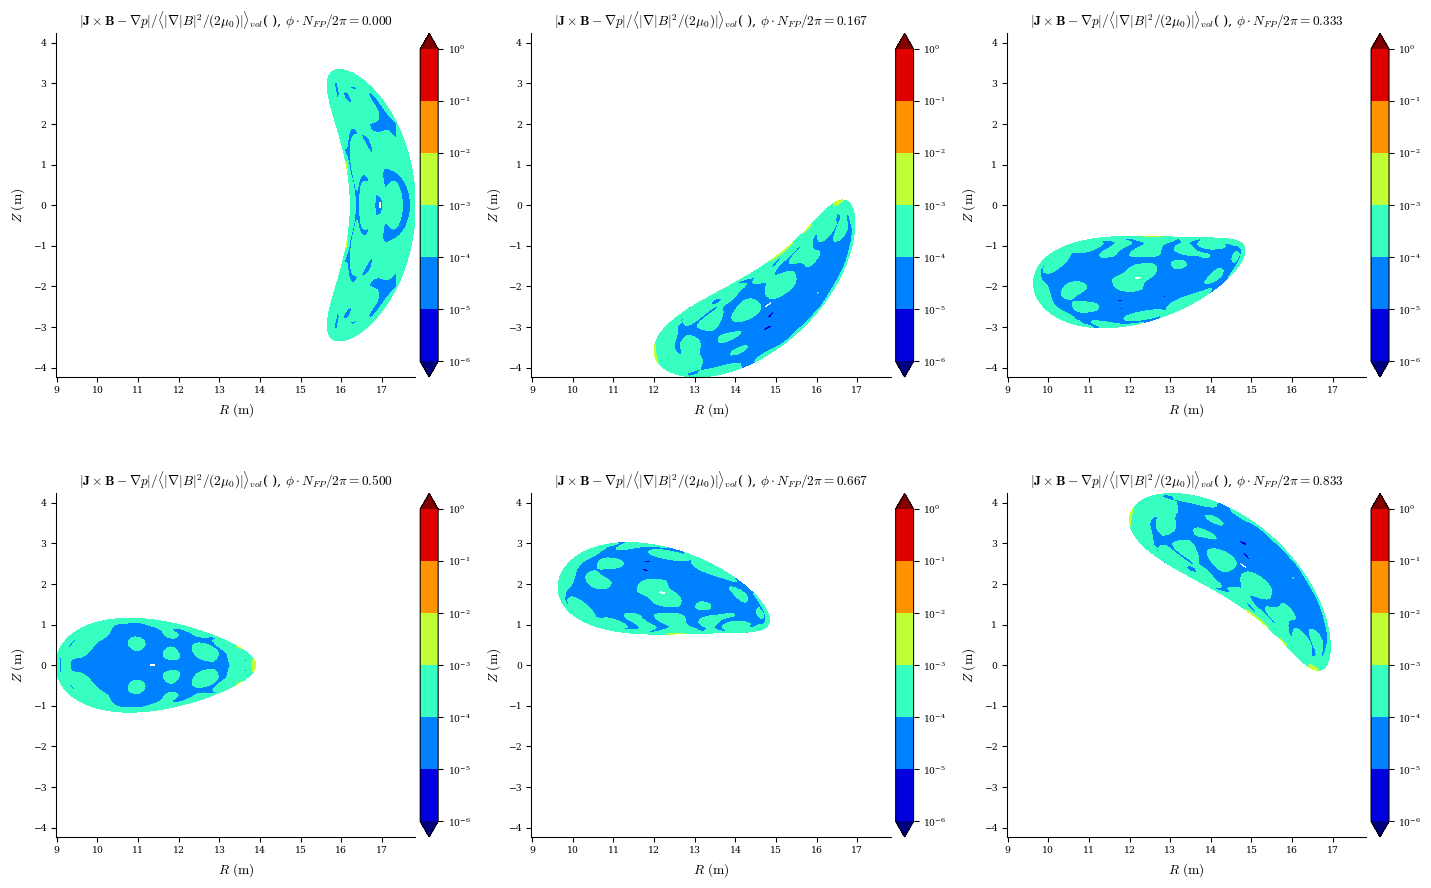

In [33]:
plot_section(eq, "|F|_normalized", log=True);

In [35]:
phi_vmec = np.loadtxt("initial_condition/phi_vmec.txt")
s_booz = np.loadtxt("initial_condition/s_booz.txt")
theta_vmec = np.loadtxt("initial_condition/theta_vmec.txt")
vartheta_booz = np.loadtxt("initial_condition/vartheta_booz.txt")
zeta_booz = np.loadtxt("initial_condition/zeta_booz.txt")

In [40]:
coords_booz = jnp.array([s_booz, vartheta_booz, zeta_booz]).T
coords_vmec = jnp.array([s_booz, theta_vmec, phi_vmec]).T

Array([0.5, 0.5, 0.5], dtype=float64)